# Dictionary EDA
`MMV | 12/4 | w266 Final Project: Crosslingual Word Embeddings`   


Some EDA related to the Panlex dictionaries in preparation for using these to modify Word2Vec for 2 langauges. Eventually may also want to explore ht differentiate between translations.

# Notebook Set-up

In [3]:
# general imports
import os
import sys  
import numpy as np
import collections
import pandas as pd
import matplotlib.pyplot as plt

# tell matplotlib not to open a new window
%matplotlib inline

In [4]:
# filepaths
BASE = '/home/mmillervedam/Data'
FPATH_EN = BASE + '/test/wiki_en_10K.txt' # first 10000 lines from wiki dump
FPATH_ES = BASE + '/test/wiki_es_10K.txt' # first 10000 lines from wiki dump
FULL_EN = BASE + '/en/full.txt'
FULL_ES = BASE + '/es/full.txt'
DPATH = '/home/mmillervedam/ProjectRepo/XlingualEmb/data/dicts/en.es.panlex.all.processed'

# Simple Stats

In [5]:
# load PanLexDictionary from file
pld = pd.read_csv(DPATH, sep='\t', names = ['en', 'es'], dtype=str)

In [12]:
# initial stats
pld.describe()

,en,es
count,711978,711978
unique,356410,346572
top,en_break,es_inglaterra
freq,179,164


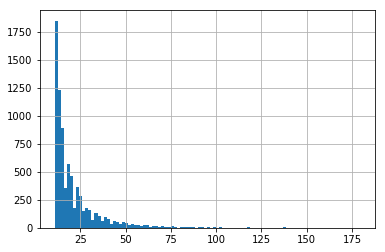

In [35]:
# multiword mappings
en_translation_counts = pld.groupby(by='en').size()
en_translation_counts[en_translation_counts > 10].hist(bins=100)

In [39]:
# really? 179 translations?
es_break = list(pld[pld.en == 'en_break']['es'])
es_break[:10]

['es_abandonar',
 'es_abatir',
 'es_abertura',
 'es_abrir',
 'es_acu\xc3\xb1ar',
 'es_agrietar',
 'es_alterar',
 'es_amanecer',
 'es_amansar',
 'es_amortiguar']

In [40]:
# Words with more than 50 translations
flex_words = en_translation_counts[en_translation_counts > 50]
len(flex_words)

380

In [49]:
# Words with more than 130 translations
super_flex_words = en_translation_counts[en_translation_counts > 130]
print(flex_words)

en
en_break    179
en_clear    131
en_cover    158
en_cut      144
en_end      138
en_get      137
en_go       137
en_hit      143
en_pass     133
en_place    155
en_set      166
en_stop     134
en_take     133
en_work     135
dtype: int64


In [66]:
# Words with just 1 translations
inflex_words = en_translation_counts[en_translation_counts < 2]
print("Total: {} unique words".format(len(inflex_words)))
inflex_words.sample(10)

Total: 268959 unique words


en
en_swiss_grand_prix              1
en_baby's_room                   1
en_pharmacies                    1
en_additional_hours              1
en_haute_randonnée_pyrénéenne    1
en_södermanland_county           1
en_cabbalah                      1
en_baden-wuerttemberg            1
en_tecún_umán                    1
en_tawny-shouldered_blackbird    1
dtype: int64

In [71]:
# some fun words in this dictionary
fun_list = ["en_pseudo-sophisticated", "en_peppermint_patty", "en_tawny-shouldered_blackbird",
            "en_freedom_of_mobile_multimedia_access", "en_love_wave"]
pld[pld.en.isin(fun_list)]

,en,es
254742,en_freedom_of_mobile_multimedia_access,es_foma
385046,en_love_wave,es_depresión
385047,en_love_wave,es_zona_de_baja_presión
474608,en_peppermint_patty,es_pastelillo_de_menta
509387,en_pseudo-sophisticated,es_altanera
509388,en_pseudo-sophisticated,es_ostentoso
631105,en_tawny-shouldered_blackbird,es_agelaius_humeralis
